In [1]:
import requests

In [2]:
# Parag Parikh Flexi Cap Fund - Direct Plan - Growth
response = requests.get("https://api.mfapi.in/mf/122639")

In [31]:
# "HDFC Index Fund - BSE Sensex Plan - Direct Plan"
response = requests.get("https://api.mfapi.in/mf/119065")
fund_name="HDFC Index Fund - BSE Sensex Plan - Direct Plan".replace(' ','_').lower()


In [4]:
meta,data=response.json()["meta"],response.json()["data"]

In [5]:
meta

{'fund_house': 'HDFC Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Other Scheme - Index Funds',
 'scheme_code': 119065,
 'scheme_name': 'HDFC Index Fund - BSE Sensex Plan - Direct Plan'}

In [6]:
data[:5]

[{'date': '01-10-2024', 'nav': '792.71850'},
 {'date': '30-09-2024', 'nav': '793.03760'},
 {'date': '27-09-2024', 'nav': '805.03630'},
 {'date': '26-09-2024', 'nav': '807.52670'},
 {'date': '25-09-2024', 'nav': '801.26700'}]

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame(data)

In [9]:
del response
del data

In [10]:
df.head()

,date,nav
0,01-10-2024,792.71850
1,30-09-2024,793.03760
2,27-09-2024,805.03630
3,26-09-2024,807.52670
4,25-09-2024,801.26700


In [11]:
df.describe()

,date,nav
count,2892,2892
unique,2892,2892
top,01-01-2013,163.63380
freq,1,1


In [12]:
from datetime import datetime

In [13]:
df["date"].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

0      2024-10-01
1      2024-09-30
2      2024-09-27
3      2024-09-26
4      2024-09-25
          ...    
2887   2013-01-07
2888   2013-01-04
2889   2013-01-03
2890   2013-01-02
2891   2013-01-01
Name: date, Length: 2892, dtype: datetime64[ns]

In [14]:
df.index, df.columns

(RangeIndex(start=0, stop=2892, step=1),
 Index(['date', 'nav'], dtype='object'))

In [15]:
df.isna().sum()

date    0
nav     0
dtype: int64

In [16]:
df.dtypes

date    object
nav     object
dtype: object

In [17]:
df["nav"]=df["nav"].astype(float)

In [18]:
df=df.set_index(["date"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2892 entries, 01-10-2024 to 01-01-2013
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nav     2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2+ KB


In [20]:
df.dtypes

nav    float64
dtype: object

In [21]:
df=df.reindex(index=df.index[::-1])
df.head()

,nav
date,
01-01-2013,163.6338
02-01-2013,164.7386
03-01-2013,165.1558
04-01-2013,165.3131
07-01-2013,164.5376


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'NAV')

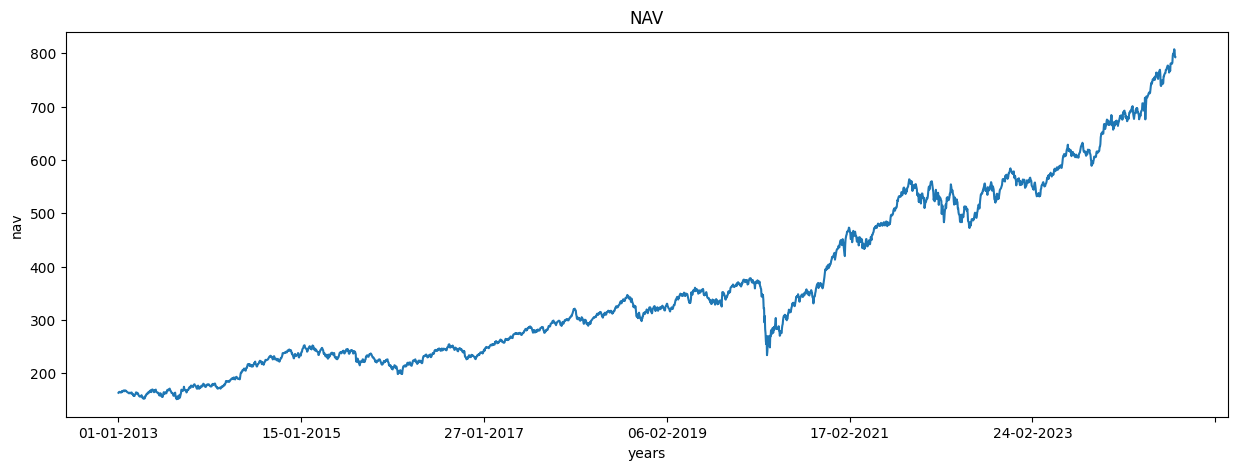

In [23]:
plt.figure(figsize = (15,5))
df['nav'].plot()
plt.xlabel("years")
plt.ylabel("nav")
plt.title("NAV")

In [24]:
mini=['None',99999999]
err_map={}
for avg_len in [300,250,200,50,25,10,5,3,2]:
    column_name=f"mean_{avg_len}"
    df[column_name]=df["nav"].rolling(avg_len).mean()
    er=(((df[column_name]-df["nav"])**2)**1/2).sum()/df.shape[0]
    err_map[f"mean_{avg_len}"]=er
    if er < mini[1]:
        mini=[column_name,er]

In [25]:
mini

['mean_2', np.float64(1.795967578742664)]

In [26]:
err_map

{'mean_300': np.float64(988.9553257489462),
 'mean_250': np.float64(789.9080434277996),
 'mean_200': np.float64(599.1186341566636),
 'mean_50': np.float64(129.2467471377328),
 'mean_25': np.float64(59.723187024906366),
 'mean_10': np.float64(20.56375337891416),
 'mean_5': np.float64(8.445968874976693),
 'mean_3': np.float64(3.9353661928434733),
 'mean_2': np.float64(1.795967578742664)}

In [27]:
df["mean_250"][0:250].tail()

date
27-12-2013           NaN
30-12-2013           NaN
31-12-2013           NaN
01-01-2014           NaN
02-01-2014    166.003155
Name: mean_250, dtype: float64

In [28]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

<Figure size 640x480 with 0 Axes>

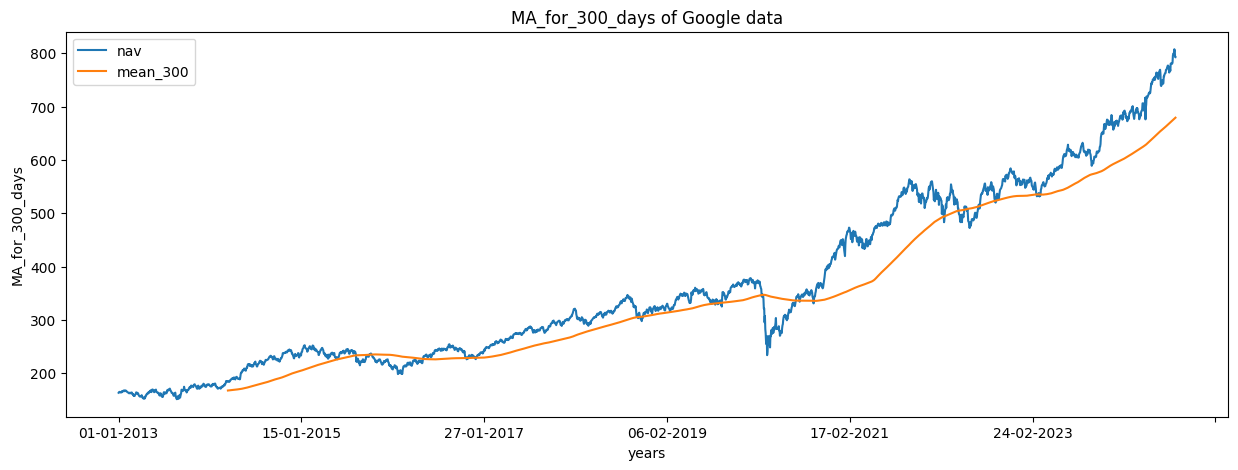

<Figure size 640x480 with 0 Axes>

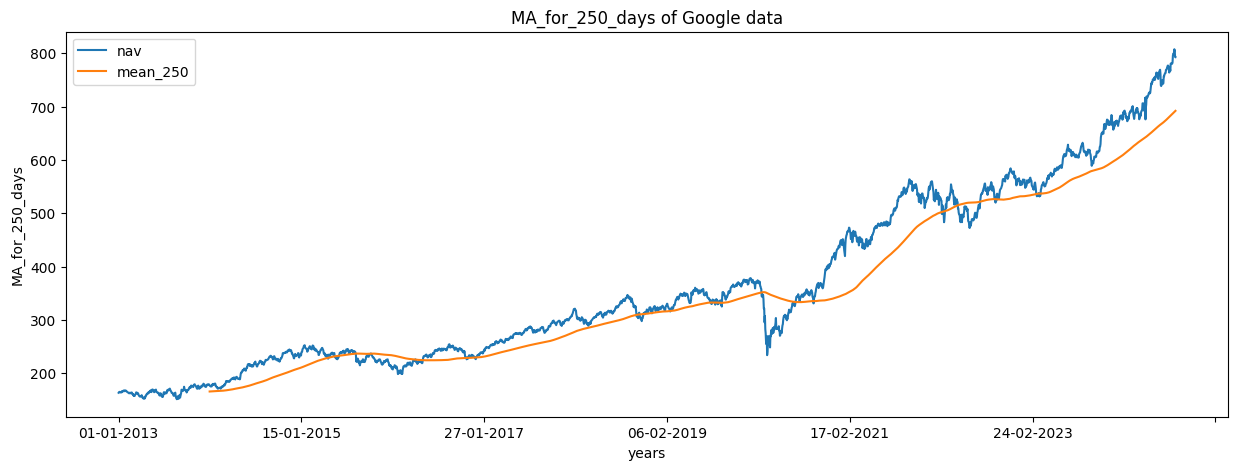

<Figure size 640x480 with 0 Axes>

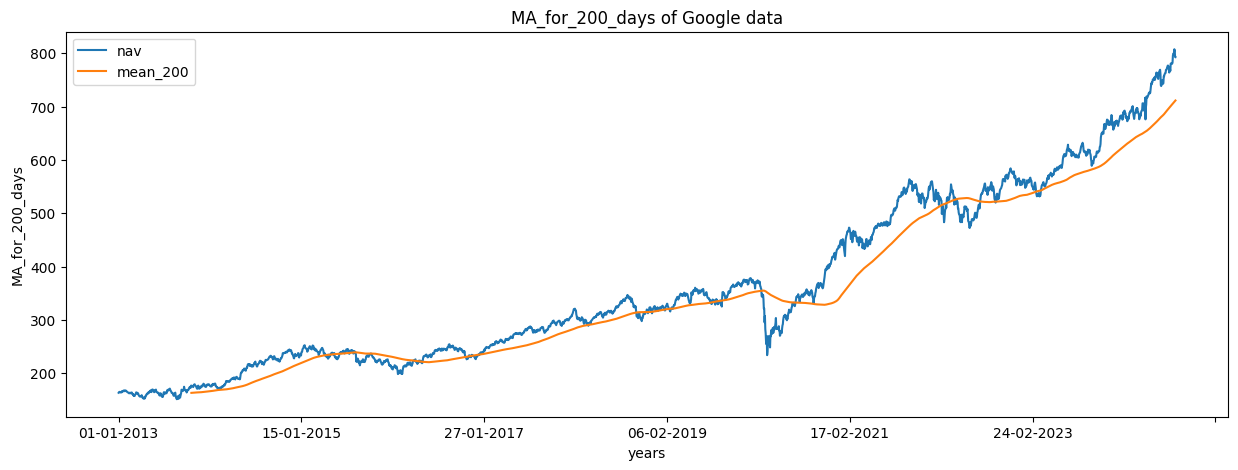

<Figure size 640x480 with 0 Axes>

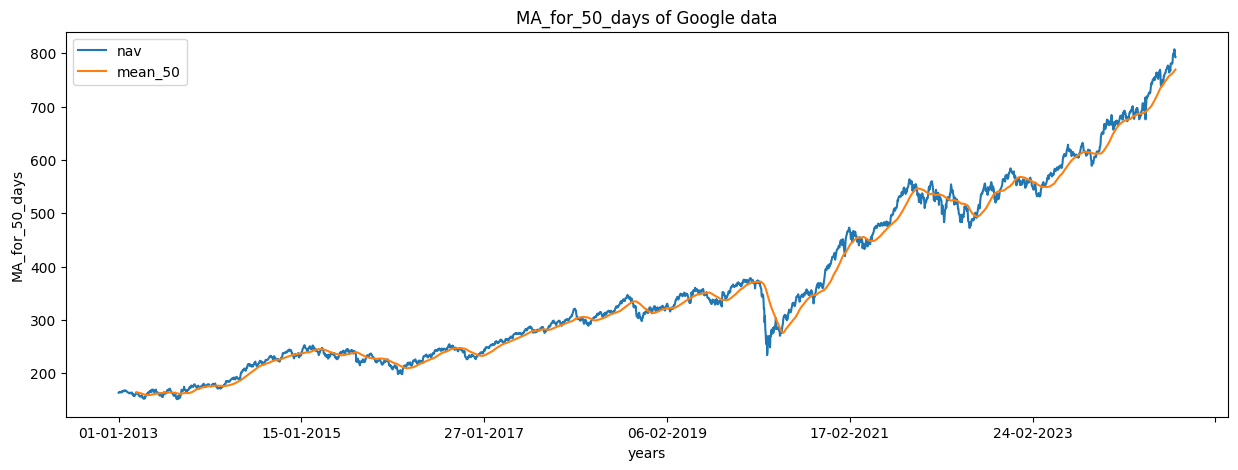

<Figure size 640x480 with 0 Axes>

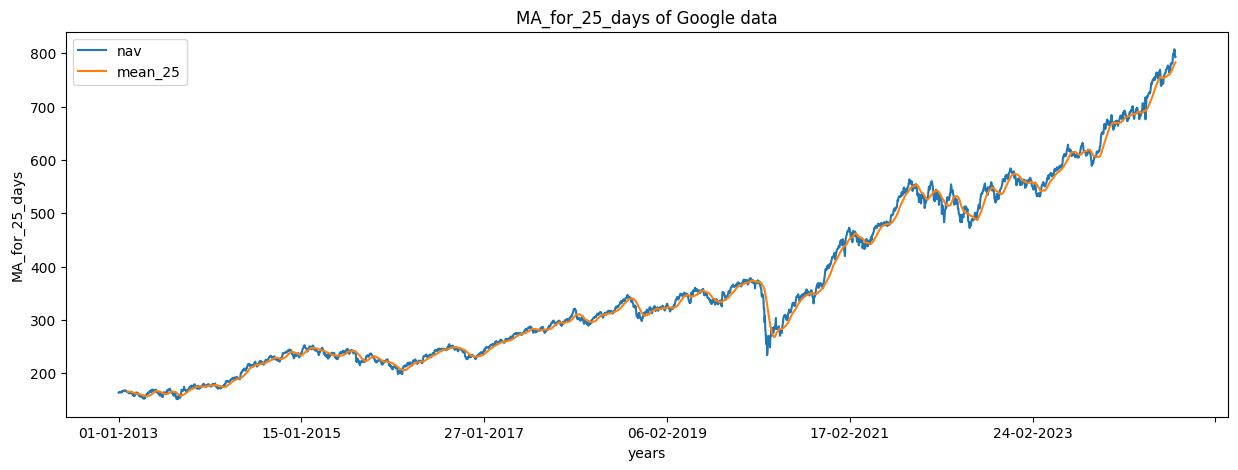

<Figure size 640x480 with 0 Axes>

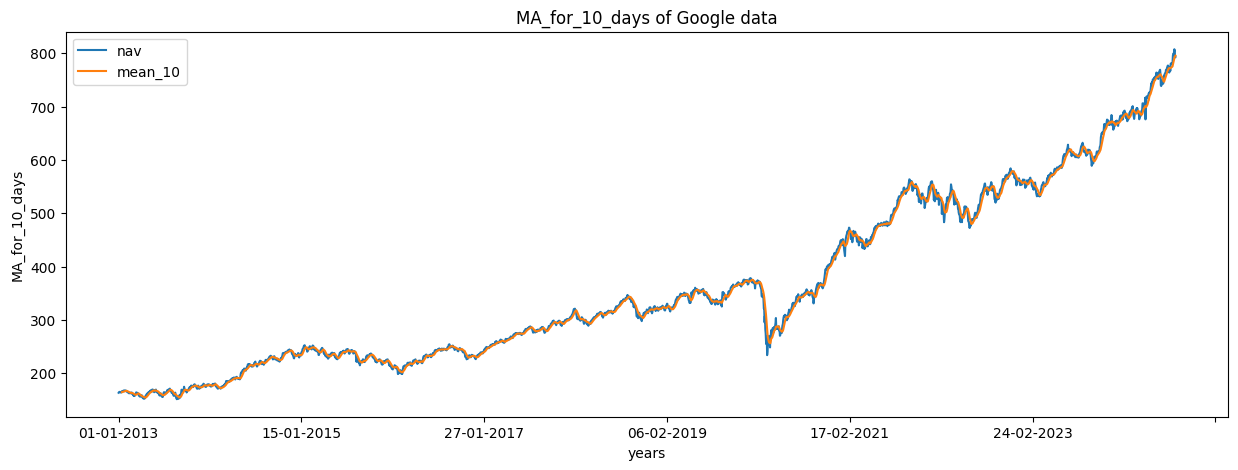

<Figure size 640x480 with 0 Axes>

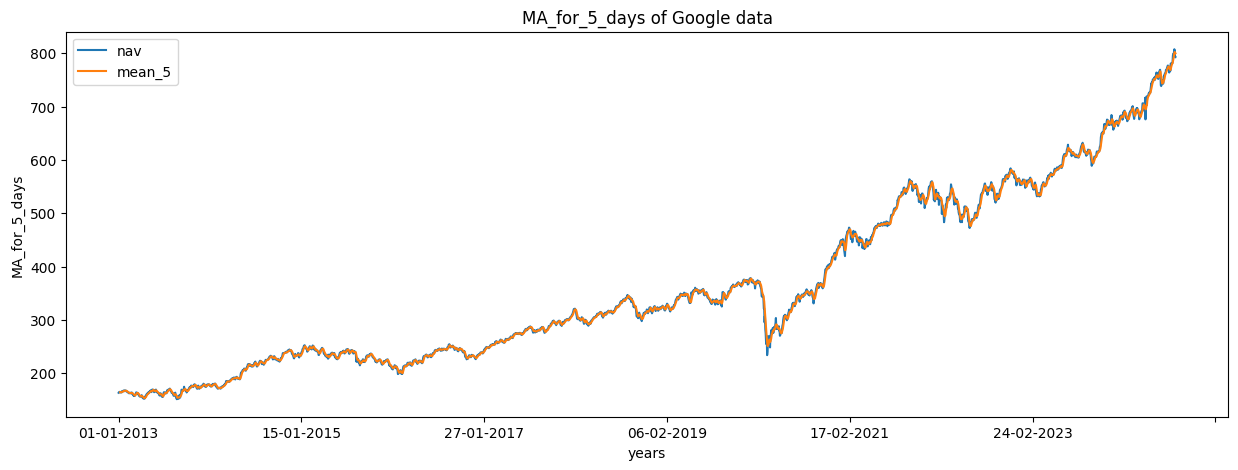

<Figure size 640x480 with 0 Axes>

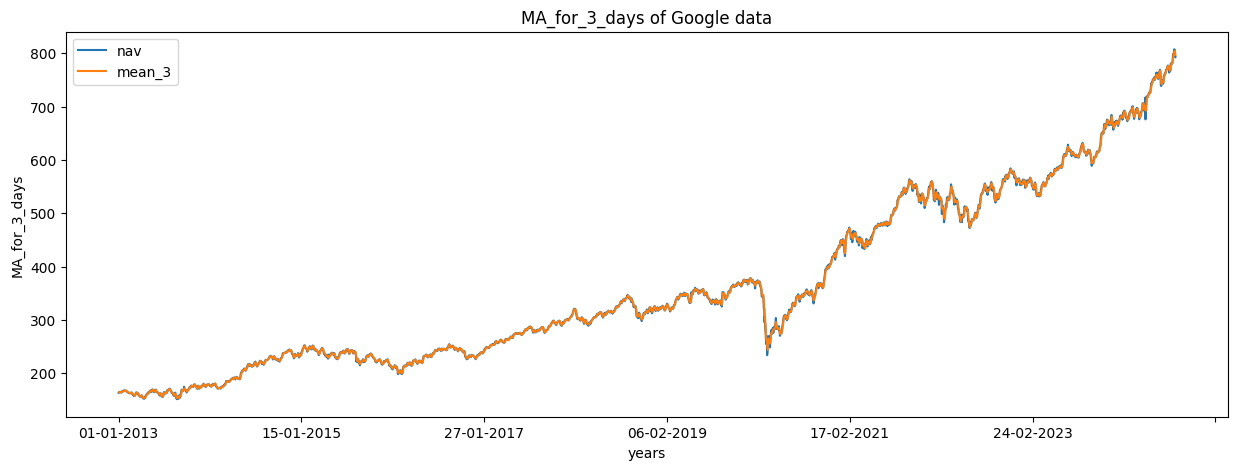

<Figure size 640x480 with 0 Axes>

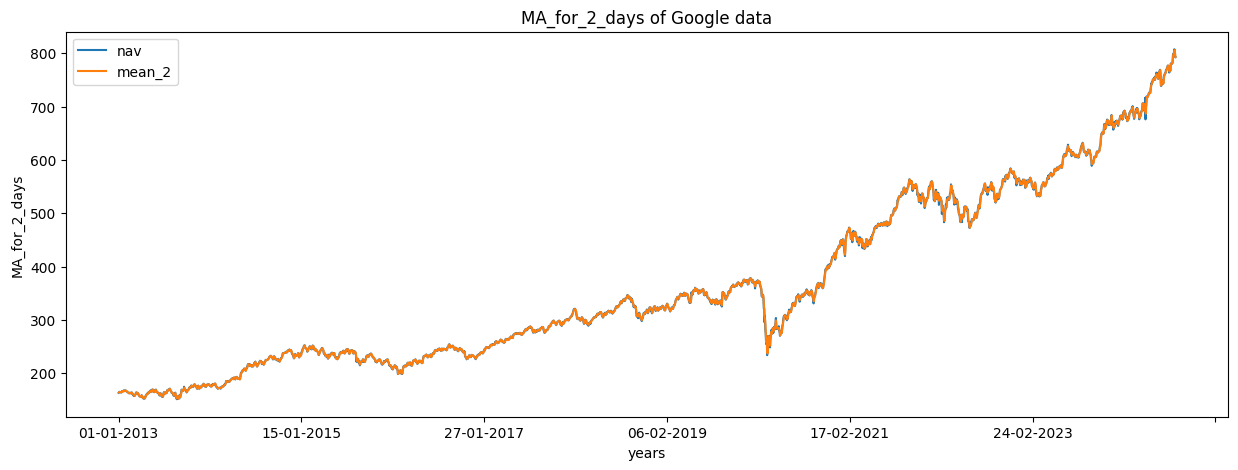

In [29]:
for avg_len in [300,250,200,50,25,10,5,3,2]:
    column_name=f"mean_{avg_len}"
    plot_graph((15,5), df[['nav',column_name]], f'MA_for_{avg_len}_days')

In [30]:
df[319:].head()

,nav,mean_300,mean_250,mean_200,mean_50,mean_25,mean_10,mean_5,mean_3,mean_2
date,,,,,,,,,,
16-04-2014,188.5278,169.368655,171.100405,173.069059,181.566430,187.750748,190.44458,190.91388,190.092433,189.39875
17-04-2014,191.4746,169.450220,171.245366,173.242862,181.917176,187.982304,190.59150,190.79012,190.090700,190.00120
21-04-2014,192.6034,169.535160,171.404927,173.425468,182.340810,188.295612,190.76321,190.87106,190.868600,192.03900
22-04-2014,192.5503,169.622986,171.560497,173.593553,182.762910,188.596548,190.96477,191.08516,192.209433,192.57685
23-04-2014,193.5122,169.717188,171.707192,173.744992,183.196272,188.963400,191.38697,191.73366,192.888633,193.03125


In [32]:
df.to_csv(f'{fund_name}.csv')